## Heart Disease prediction using XGboost

In [1]:
import pandas as pd
data= pd.read_csv("datasets/heart_disease.csv")
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [2]:
data.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [3]:
# data["Cholesterol Level"] = data["Cholesterol Level"].fillna(data["Cholesterol Level"].mean())

In [4]:
data.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

***Dropping Irrelevant columns***

In [5]:
data.drop(columns=['Low HDL Cholesterol', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure'],inplace=True)

***Separates Categorical and Numeric columns***

In [6]:
categ_columns= data.select_dtypes(include= ['object']).columns.to_list()
numeric_columns= data.select_dtypes(include= ['int', 'float64']).columns.to_list()

print("categorical columns: ",categ_columns)
print("numeric columns" ,numeric_columns)

categorical columns:  ['Gender', 'Exercise Habits', 'Smoking', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']
numeric columns ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']


***Handling missing value***

In [7]:
for col in categ_columns:
    data[col]= data[col].fillna(data[col].mode()[0])

In [8]:
data.isnull().sum()

Age                     29
Gender                   0
Blood Pressure          19
Cholesterol Level       30
Exercise Habits          0
Smoking                  0
BMI                     22
High LDL Cholesterol     0
Alcohol Consumption      0
Stress Level             0
Sleep Hours             25
Sugar Consumption        0
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

In [9]:
for col in numeric_columns:
    data[col]= data[col].fillna(data[col].mean())

In [10]:
data.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
BMI                     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

***Encoding Categorical Columns***

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for col in categ_columns:
   data[col]= encoder.fit_transform(data[col])

***Defining Features and Target***

In [12]:
x= data.drop(columns= ["Heart Disease Status"])
y= data["Heart Disease Status"]

***Splitting data into training and testing***

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42, test_size=0.2)


***Training the XGboost model***

In [14]:
from xgboost import XGBClassifier
xgbmodel= XGBClassifier(n_estimators= 300,
                        max_depth= 6,
                        learning_rate= 0.01,
                        random_state= 10,
                        )

xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

***Evaluate model performance***

In [15]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
y_pred= xgbmodel.predict(x_test)

accuracy= accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy:.4f}")

print(classification_report(y_test,y_pred))

print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred))

accuracy:0.8065
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

confusion matrix: 
[[1613    0]
 [ 387    0]]


c:\Users\FAST\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FAST\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FAST\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

***Feature importance analysis***

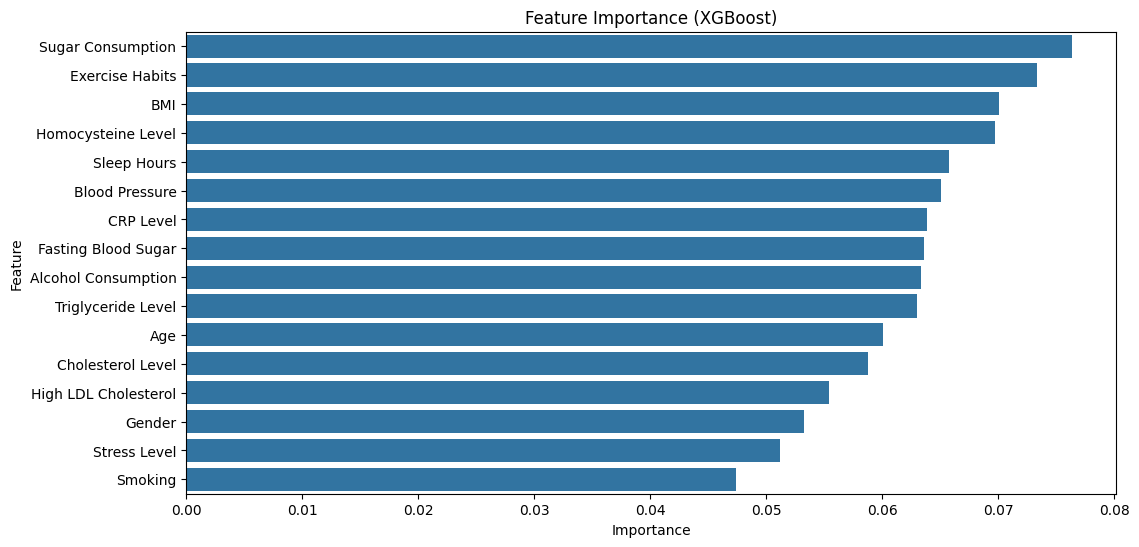

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = xgbmodel.feature_importances_
feature_names = x.columns

feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"])
plt.title("Feature Importance (XGBoost)")
plt.show()


***Hyperparameter Tuning***

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2]
}

grid_search = RandomizedSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
